In [129]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [130]:
# https://www.transtats.bts.gov/Data_Elements.aspx?Data=2
# US flight data for domestic and international
# *Most recent three months of international data by airport and by carrier withheld because of confidentiality agreements for individual routes. 
# Summary totals are shown for all airports and all carriers. 

flight_data_df = pd.read_csv('RawData/Flights_3_12_2020.csv')

In [131]:
flight_data_df

,Year,Month,DOMESTIC,INTERNATIONAL,TOTAL
0,2002,10,"815,489","92,565","908,054"
1,2002,11,"766,775","91,342","858,117"
2,2002,12,"782,175","96,881","879,056"
3,2002,TOTAL,"8,085,083","1,023,994","9,109,077"
4,2003,1,"785,651","98,053","883,704"
...,...,...,...,...,...
224,2019,TOTAL,"8,591,641","1,620,275","10,211,916"
225,NaN,NaN,NaN,NaN,NaN
226,Note: All numbers are for scheduled services.,NaN,NaN,NaN,NaN
227,NaN,NaN,NaN,NaN,NaN


In [132]:
# Drop the last few rows which have null values
flight_data_df = flight_data_df.dropna(how='any')

In [133]:
flight_data_df

,Year,Month,DOMESTIC,INTERNATIONAL,TOTAL
0,2002,10,"815,489","92,565","908,054"
1,2002,11,"766,775","91,342","858,117"
2,2002,12,"782,175","96,881","879,056"
3,2002,TOTAL,"8,085,083","1,023,994","9,109,077"
4,2003,1,"785,651","98,053","883,704"
...,...,...,...,...,...
220,2019,9,"703,929","123,258","827,187"
221,2019,10,"740,139","126,268","866,407"
222,2019,11,"694,283","119,996","814,279"
223,2019,12,"720,447","131,795","852,242"


In [134]:
# Drop the rows which have totals for each year
flight_data_df = flight_data_df[flight_data_df['Month'] != 'TOTAL']

In [135]:
flight_data_df 

,Year,Month,DOMESTIC,INTERNATIONAL,TOTAL
0,2002,10,"815,489","92,565","908,054"
1,2002,11,"766,775","91,342","858,117"
2,2002,12,"782,175","96,881","879,056"
4,2003,1,"785,651","98,053","883,704"
5,2003,2,"690,750","85,965","776,715"
...,...,...,...,...,...
219,2019,8,"769,346","147,077","916,423"
220,2019,9,"703,929","123,258","827,187"
221,2019,10,"740,139","126,268","866,407"
222,2019,11,"694,283","119,996","814,279"


In [136]:
# Make all columns as float
columns = flight_data_df.columns
for column in columns:
    flight_data_df[column] = flight_data_df[column].str.replace(",","").astype(float)

/Users/beastmode/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [137]:
# Make Year and Month into integers
flight_data_df['Year'] = flight_data_df['Year'].astype(int)
flight_data_df['Month'] = flight_data_df['Month'].astype(int)

/Users/beastmode/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/beastmode/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [138]:
# Make a date column that uses the month and year and assumes the 1st of every month
Date = []
for y, m in zip(flight_data_df.Year, flight_data_df.Month):
    Date.append(datetime(y, m, 1))

flight_data_df['Date'] = Date

/Users/beastmode/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [139]:
flight_data_df

,Year,Month,DOMESTIC,INTERNATIONAL,TOTAL,Date
0,2002,10,815489.0,92565.0,908054.0,2002-10-01
1,2002,11,766775.0,91342.0,858117.0,2002-11-01
2,2002,12,782175.0,96881.0,879056.0,2002-12-01
4,2003,1,785651.0,98053.0,883704.0,2003-01-01
5,2003,2,690750.0,85965.0,776715.0,2003-02-01
...,...,...,...,...,...,...
219,2019,8,769346.0,147077.0,916423.0,2019-08-01
220,2019,9,703929.0,123258.0,827187.0,2019-09-01
221,2019,10,740139.0,126268.0,866407.0,2019-10-01
222,2019,11,694283.0,119996.0,814279.0,2019-11-01


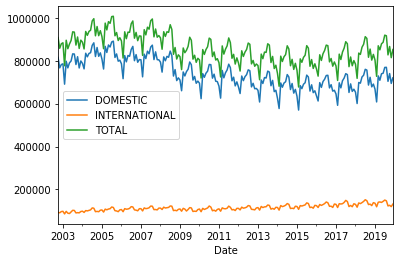

In [140]:
ax = plt.gca()
flight_data_df.plot.line(x = 'Date', y='DOMESTIC',ax=ax)
flight_data_df.plot.line(x = 'Date', y='INTERNATIONAL',ax=ax)
flight_data_df.plot.line(x = 'Date', y='TOTAL',ax=ax)
plt.show()

In [154]:
#https://data.humdata.org/dataset/ebola-cases-2014
ebola_df = pd.read_csv('RawData/ebola_data_db_format.csv')
ebola_df.head()

,Indicator,Country,Date,value
0,"Cumulative number of confirmed, probable and s...",Guinea,2015-03-10,3285.0
1,Cumulative number of confirmed Ebola cases,Guinea,2015-03-10,2871.0
2,Cumulative number of probable Ebola cases,Guinea,2015-03-10,392.0
3,Cumulative number of suspected Ebola cases,Guinea,2015-03-10,22.0
4,"Cumulative number of confirmed, probable and s...",Guinea,2015-03-10,2170.0


In [155]:
ebola_df['Indicator'].value_counts()

Cumulative number of confirmed, probable and suspected Ebola deaths                            2485
Cumulative number of confirmed Ebola cases                                                     2484
Cumulative number of confirmed, probable and suspected Ebola cases                             2477
Cumulative number of probable Ebola cases                                                      2436
Cumulative number of suspected Ebola cases                                                     2366
Cumulative number of confirmed Ebola deaths                                                    1648
Cumulative number of probable Ebola deaths                                                     1526
Cumulative number of suspected Ebola deaths                                                    1308
Number of confirmed, probable and suspected Ebola cases in the last 21 days                     190
Number of confirmed Ebola cases in the last 21 days                                             190


In [156]:
# Keep the only two indicators I care about
ebola_df = ebola_df[(ebola_df['Indicator']=='Cumulative number of confirmed, probable and suspected Ebola cases')|
        (ebola_df['Indicator']=='Cumulative number of confirmed, probable and suspected Ebola deaths')]

In [157]:
# Pivot table on values and make new columns as indicators
ebola_df = ebola_df.pivot_table(values='value', index=['Country', 'Date'], columns=['Indicator'])
ebola_df= ebola_df.reset_index()
ebola_df

Indicator,Country,Date,"Cumulative number of confirmed, probable and suspected Ebola cases","Cumulative number of confirmed, probable and suspected Ebola deaths"
0,Guinea,2014-08-29,648.0,430.0
1,Guinea,2014-09-05,812.0,517.0
2,Guinea,2014-09-08,862.0,555.0
3,Guinea,2014-09-12,861.0,557.0
4,Guinea,2014-09-16,936.0,595.0
...,...,...,...,...
2480,United States of America,2015-12-17,4.0,1.0
2481,United States of America,2015-12-22,4.0,1.0
2482,United States of America,2015-12-23,4.0,1.0
2483,United States of America,2015-12-29,4.0,1.0


In [158]:
ebola_df['Country'].value_counts()

Guinea                      259
Liberia                     259
Sierra Leone                259
Nigeria                     255
Senegal                     254
United States of America    245
Mali                        243
Spain                       243
United Kingdom              221
Italy                       141
Liberia 2                   105
Guinea 2                      1
Name: Country, dtype: int64

In [159]:
# Fix country names
ebola_df['Country'] = ebola_df['Country'].replace({'Liberia 2': 'Liberia', 'Guinea 2': 'Liberia'})

# Rename columns
ebola_df = ebola_df.rename(columns=
                    {'Cumulative number of confirmed, probable and suspected Ebola deaths': 'Cumulative Number of Ebola Deaths',
                    'Cumulative number of confirmed, probable and suspected Ebola cases': 'Cumulative Number of Ebola Cases'})
# Sort by date and country
ebola_df = ebola_df.sort_values(by=['Date', 'Country'])
ebola_df

Indicator,Country,Date,Cumulative Number of Ebola Cases,Cumulative Number of Ebola Deaths
0,Guinea,2014-08-29,648.0,430.0
401,Liberia,2014-08-29,1378.0,694.0
1008,Nigeria,2014-08-29,19.0,7.0
1517,Sierra Leone,2014-08-29,1026.0,422.0
1,Guinea,2014-09-05,812.0,517.0
...,...,...,...,...
1516,Senegal,2016-03-23,1.0,0.0
1775,Sierra Leone,2016-03-23,14122.0,3955.0
2018,Spain,2016-03-23,1.0,0.0
2239,United Kingdom,2016-03-23,1.0,0.0


In [160]:
# Get the last date for each county
last_ebola_data = ebola_df[ebola_df['Date'] == max(ebola_df['Date'])].reset_index()
last_ebola_data

Indicator,index,Country,Date,Cumulative Number of Ebola Cases,Cumulative Number of Ebola Deaths
0,258,Guinea,2016-03-23,3804.0,2536.0
1,400,Italy,2016-03-23,1.0,0.0
2,259,Liberia,2016-03-23,5.0,4.0
3,659,Liberia,2016-03-23,10666.0,4806.0
4,764,Liberia,2016-03-23,9.0,3.0
5,1007,Mali,2016-03-23,8.0,6.0
6,1262,Nigeria,2016-03-23,20.0,8.0
7,1516,Senegal,2016-03-23,1.0,0.0
8,1775,Sierra Leone,2016-03-23,14122.0,3955.0
9,2018,Spain,2016-03-23,1.0,0.0


In [161]:
# Get final counts for cases, deaths, and mortality rate
final_ebola_cases = last_ebola_data['Cumulative Number of Ebola Cases'].sum()
final_ebola_deaths = last_ebola_data['Cumulative Number of Ebola Deaths'].sum()
ebola_mortality_rate = final_ebola_deaths/final_ebola_deaths

In [162]:
# Get list of dates sorted
dates = ebola_df['Date'].unique().tolist()
dates.sort()

# Group by dates and sum of cases and deaths for each country on date
grouped_date_ebola = ebola_df.groupby('Date')
total_cases = grouped_date_ebola['Cumulative Number of Ebola Cases'].sum().tolist()
total_deathes = grouped_date_ebola['Cumulative Number of Ebola Deaths'].sum().tolist()

In [163]:
# Get cumulative number of cases and deaths across date
grouped_date_ebola =  pd.DataFrame({'Date': dates,
                                   'Cumulative Number of Ebola Cases': total_cases,
                                   'Cumulative Number of Ebola Deaths': total_deathes})

In [164]:
# Create columns that have the change of cases and deaths over the dates
daily_ebola_cases = [grouped_date_ebola.iloc[0,1]]
daily_ebola_deaths = [grouped_date_ebola.iloc[0,2]]

for x in range(1,len(grouped_date_ebola)):
    daily_case = grouped_date_ebola.iloc[x,1] - grouped_date_ebola.iloc[x-1,1]
    daily_ebola_cases.append(daily_case)
    daily_deaths = grouped_date_ebola.iloc[x,2] - grouped_date_ebola.iloc[x-1,2]
    daily_ebola_deaths.append(daily_deaths)
    
grouped_date_ebola['Change in Number of Ebola Cases'] = daily_ebola_cases
grouped_date_ebola['Change in Number of Ebola Deaths'] = daily_ebola_deaths
grouped_date_ebola

,Date,Cumulative Number of Ebola Cases,Cumulative Number of Ebola Deaths,Change in Number of Ebola Cases,Change in Number of Ebola Deaths
0,2014-08-29,3071.0,1553.0,3071.0,1553.0
1,2014-09-05,3967.0,2105.0,896.0,552.0
2,2014-09-08,4293.0,2296.0,326.0,191.0
3,2014-09-12,4390.0,2226.0,97.0,-70.0
4,2014-09-16,4985.0,2461.0,595.0,235.0
...,...,...,...,...,...
254,2015-12-17,28638.0,11315.0,-2.0,0.0
255,2015-12-22,28637.0,11315.0,-1.0,0.0
256,2015-12-23,28637.0,11315.0,0.0,0.0
257,2015-12-29,28637.0,11315.0,0.0,0.0


In [172]:
# Create new column that has month and year so we can compare with flight data later
grouped_date_ebola['Month and Year'] = pd.to_datetime(grouped_date_ebola['Date']).dt.to_period('M')
grouped_ebola = grouped_date_ebola.groupby('Month and Year')
grouped_ebola = grouped_ebola.sum()

In [175]:
# Create new dataframe that has it monthly cases and years
grouped_monthly_ebola =  pd.DataFrame({'Monthly Number of Ebola Cases': grouped_ebola['Change in Number of Ebola Cases'],
                                   'Monthly Number of Ebola Deaths': grouped_ebola['Change in Number of Ebola Deaths']})
grouped_monthly_ebola.reset_index()

,Month and Year,Monthly Number of Ebola Cases,Monthly Number of Ebola Deaths
0,2014-08,3071.0,1553.0
1,2014-09,3503.0,1538.0
2,2014-10,6993.0,1860.0
3,2014-11,2368.0,738.0
4,2014-12,4270.0,2216.0
5,2015-01,1954.0,939.0
6,2015-02,1701.0,831.0
7,2015-03,1132.0,690.0
8,2015-04,1333.0,540.0
9,2015-05,766.0,252.0


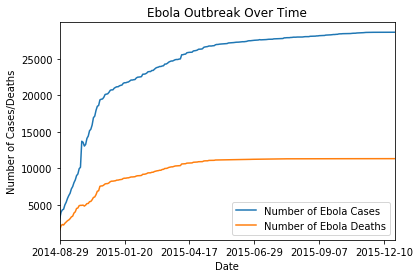

In [51]:
import matplotlib.dates as mdates

ax = plt.gca()
grouped_date_ebola.plot.line(x = 'Date', y='Number of Ebola Cases',ax=ax)
grouped_date_ebola.plot.line(x = 'Date', y='Number of Ebola Deaths',ax=ax)
plt.title('Ebola Outbreak Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases/Deaths')
# #set ticks every week
# ax.xaxis.set_major_locator(mdates.WeekdayLocator())
# #set major ticks format
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

plt.show()

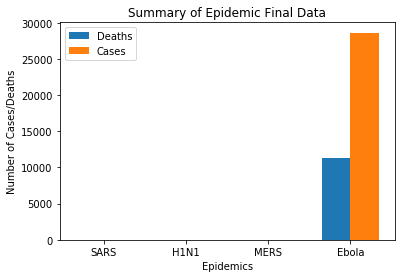

In [57]:
import numpy as np


cases = (20, 35, 30, final_ebola_cases)
deaths = (25, 32, 34, final_ebola_deaths)

x = np.arange(4) 
width = 0.35       
plt.bar(x, deaths, width, label='Deaths')
plt.bar(x + width, cases, width, label='Cases')

plt.xlabel('Epidemics')
plt.ylabel('Number of Cases/Deaths')
plt.title('Summary of Epidemic Final Data')

plt.xticks(x + width / 2, ('SARS', 'H1N1', 'MERS', 'Ebola'))
plt.legend(loc='best')
plt.show()